## Multi-channel ℓ2-TV denoising (Gaussian white noise)

This notebook demonstrates the use of SPORCO to solve an ℓ2-TV denoising
problem for colour images

$$\mathrm{argmin}_\mathbf{x} \;
  (1/2) \sum_c \| \mathbf{x}_c - \mathbf{s}_c \|_2^2 +
   \lambda \left\|  \sqrt{ \sum_c \left((G_0 \mathbf{x}_c)^2 +
   (G_1 \mathbf{x}_c)^2\right)} \right\|_1$$

where $G_0$ and $G_1$ are gradient operators along image columns and rows
respectively.



Import modules and configure matplotlib output to notebook.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco import util
from sporco import plot
from sporco.admm import tvl2

%matplotlib inline

Load reference image and construct noisy test

In [2]:
# Load reference image
try:
    img = util.ExampleImages().image('standard', 'monarch.png', scaled=True)
except:
    import scipy.misc
    url = 'http://homepages.cae.wisc.edu/~ece533/images/monarch.png'
    img = scipy.misc.imread(util.netgetdata(url)).astype(np.float32)/255.0
img = img[:,160:672]


# Construct test image
np.random.seed(12345)
imgn = img + np.random.normal(0.0, 0.1, img.shape)

Set TVL2Denoise solver class options.

In [3]:
# Set up TVL2Denoise options
lmbda = 4e-1
opt = tvl2.TVL2Denoise.Options({'Verbose' : True, 'MaxMainIter' : 200,
                    'RelStopTol' : 5e-3, 'gEvalY' : False,
                    'AutoRho' : {'Enabled' : True}})

Initialise and run ℓ2-TV solver

In [4]:
# Initialise and run TVL2Denoise object
b = tvl2.TVL2Denoise(imgn, lmbda, opt, caxis=2)
imgr = b.solve()
print("TVL2Denoise solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      RegTV     r         s         ρ         
----------------------------------------------------------------
   0  1.65e+04  1.98e+03  3.63e+04  8.57e-01  1.69e-01  9.00e-01
   1  1.24e+04  5.01e+03  1.85e+04  6.19e-01  1.15e-01  9.00e-01
   2  9.95e+03  4.50e+03  1.36e+04  3.58e-01  2.53e-01  2.09e+00
   3  8.87e+03  4.47e+03  1.10e+04  2.19e-01  2.05e-01  2.48e+00
   4  8.55e+03  4.47e+03  1.02e+04  1.59e-01  1.47e-01  2.48e+00
   5  8.40e+03  4.55e+03  9.63e+03  1.26e-01  1.12e-01  2.48e+00
   6  8.28e+03  4.59e+03  9.20e+03  1.02e-01  8.67e-02  2.48e+00
   7  8.19e+03  4.64e+03  8.85e+03  8.54e-02  7.03e-02  2.48e+00
   8  8.10e+03  4.67e+03  8.56e+03  7.06e-02  5.96e-02  2.74e+00
   9  8.02e+03  4.70e+03  8.31e+03  5.80e-02  5.16e-02  2.74e+00
  10  7.97e+03  4.71e+03  8.14e+03  4.92e-02  4.32e-02  2.74e+00
  11  7.93e+03  4.73e+03  8.02e+03  4.32e-02  3.77e-02  2.74e+00
  12  7.91e+03  4.74e+03  7.93e+03  3.88e-02  3.30e-02  2.74e+00
  13  7.89e+03  4.75e+0

Display test images

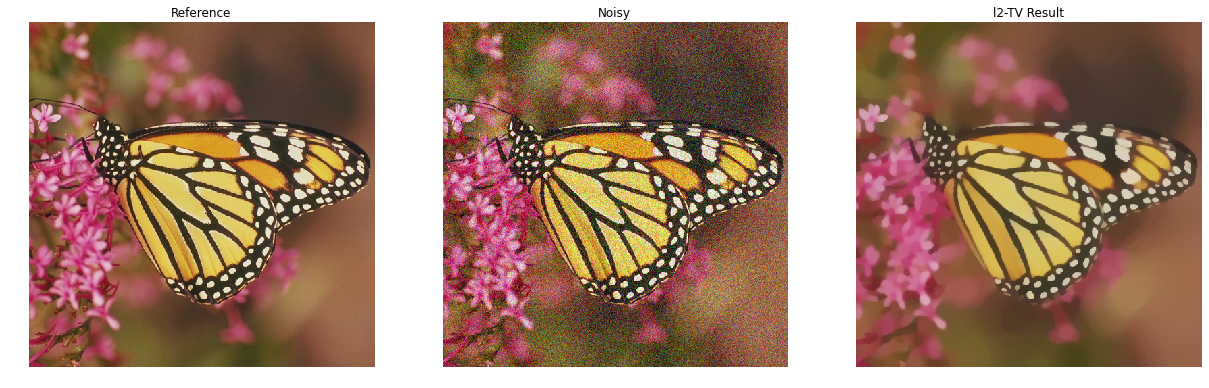

In [5]:
# Display test images
fig = plot.figure(figsize=(21,7))
plot.subplot(1,3,1)
plot.imview(img, fgrf=fig, title='Reference')
plot.subplot(1,3,2)
fgax = plot.imview(imgn, fgrf=fig, title='Noisy')
plot.subplot(1,3,3)
fxax = plot.imview(imgr, fgrf=fig, title='l2-TV Result')

Plot functional evolution during ADMM iterations.

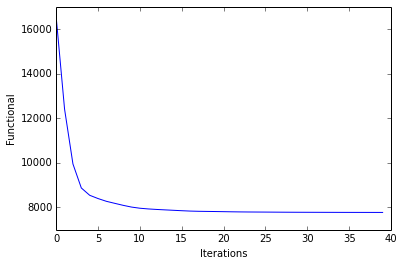

In [6]:
its = b.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')
plot.close()

Plot evolution of ADMM residuals and ADMM penalty parameter.

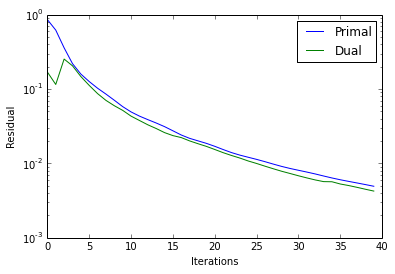

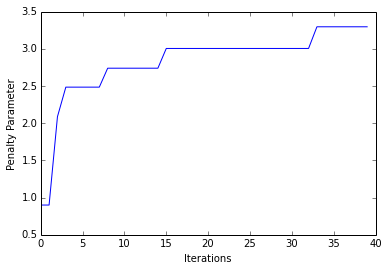

In [7]:
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual']);
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter')
plot.close()